In [2]:
# this notebook aims to generate all of the necessary plots based on models outputs.
# it may have duplicated plots shown in before notebooks
# put all of needed plots to this notebooks
# some plots will be decided to not contain in report

In [4]:
# import necessary libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

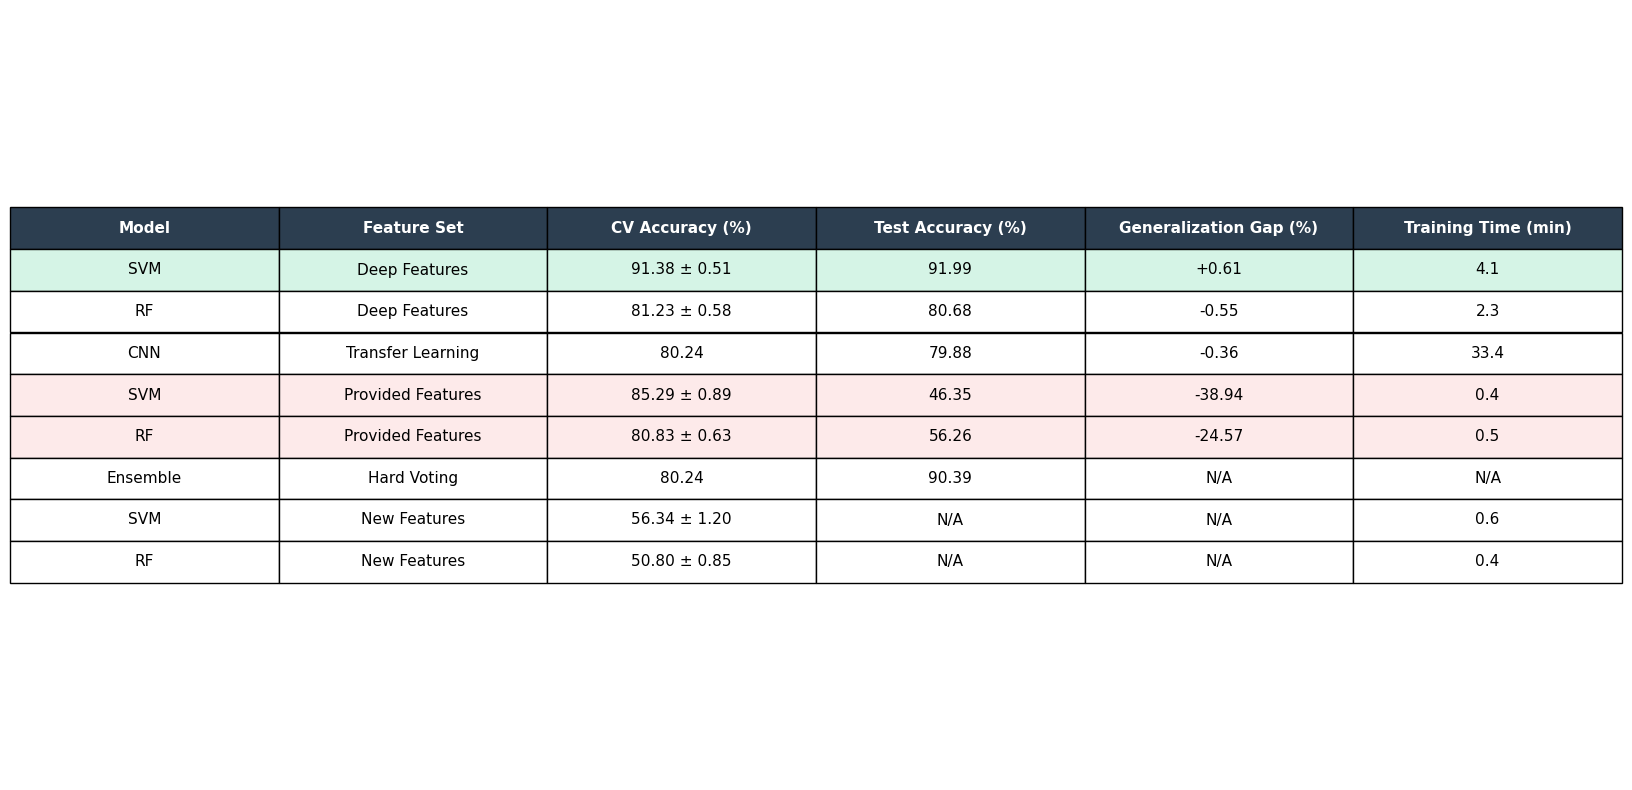

In [5]:
# set style for professional plots
plt.style.use('default')
sns.set_palette("husl")

# put my actual experimental data 
results_data = {
    'Model': ['SVM', 'RF', 'CNN', 'SVM', 'RF', 'Ensemble', 'SVM', 'RF'],
    'Feature_Set': ['Deep Features', 'Deep Features', 'Transfer Learning', 
                   'Provided Features', 'Provided Features', 'Hard Voting',
                   'New Features', 'New Features'],
    'CV_Accuracy': [91.38, 81.23, 80.24, 85.29, 80.83, np.nan, 56.34, 50.80],
    'CV_Std': [0.51, 0.58, np.nan, 0.89, 0.63, np.nan, 1.20, 0.85],
    'Test_Accuracy': [91.99, 80.68, 79.88, 46.35, 56.26, 90.39, np.nan, np.nan],
    'Training_Time': [4.1, 2.3, 33.4, 0.4, 0.5, np.nan, 0.6, 0.4]
}

results_df = pd.DataFrame(results_data)

# calculate generalization gaps
results_df['Generalization_Gap'] = results_df['Test_Accuracy'] - results_df['CV_Accuracy']

# feature set characteristics
feature_sets_data = {
    'Feature_Set': ['Deep Features', 'Provided Features', 'New Features', 'Combined'],
    'Dimensionality': [2048, 120, 56, 176],
    'Mean_Performance_CV': [84.20, 83.06, 53.57, 78.96],
    'Best_Algorithm': ['SVM (91.99%)', 'SVM (85.29% CV)', 'SVM (56.34%)', 'SVM (83.82% CV)'],
    'Characteristics': ['Transfer learning, ImageNet pre-training', 
                       'Color histograms, HOG-PCA, edge density',
                       'Domain-engineered, digit-focused',
                       'Provided + New features']
}

feature_sets_df = pd.DataFrame(feature_sets_data)

# Per-category performance (SVM + Deep Features)
category_data = {
    'Category': ['Other', 'Prohibitions', 'Mandatory', 'Warnings', 'Speed limits'],
    'F1_Score': [0.982, 0.960, 0.914, 0.890, 0.853],
    'Support': [983, 857, 789, 1071, 1788],
    'Key_Challenges': ['Highest performance (Stop, Priority road)',
                      'Strong geometric patterns',
                      'Directional arrow confusion', 
                      'Complex shape variations',
                      'Digit recognition challenges']
}

category_df = pd.DataFrame(category_data)

# Confusion pairs (most frequent)
confusion_data = {
    'True_Class': [2, 1, 4, 3, 2, 3, 9, 33, 36, 39],
    'Pred_Class': [1, 2, 2, 5, 5, 1, 10, 38, 38, 38],
    'True_Name': ['50km/h', '30km/h', '70km/h', '60km/h', '50km/h', 
                  '60km/h', 'No passing', 'Turn right', 'Go straight/right', 'Keep left'],
    'Pred_Name': ['30km/h', '50km/h', '50km/h', '80km/h', '80km/h',
                  '30km/h', 'No passing 3.5t', 'Keep right', 'Keep right', 'Keep right'],
    'Count': [30, 24, 14, 14, 13, 11, 9, 37, 22, 28]
}

confusion_df = pd.DataFrame(confusion_data)

# CNN training history
epochs_phase1 = list(range(1, 11))
epochs_phase2 = list(range(11, 19))
epochs_total = epochs_phase1 + epochs_phase2

# Phase 1: Slow improvement
train_acc_p1 = [0.054, 0.070, 0.080, 0.075, 0.084, 0.089, 0.092, 0.092, 0.101, 0.105]
val_acc_p1 = [0.057, 0.069, 0.080, 0.082, 0.092, 0.088, 0.100, 0.093, 0.130, 0.108]

# Phase 2: Explosive improvement 
train_acc_p2 = [0.101, 0.377, 0.622, 0.813, 0.895, 0.937, 0.955, 0.963]
val_acc_p2 = [0.065, 0.155, 0.229, 0.319, 0.436, 0.563, 0.751, 0.802]

train_accuracy = train_acc_p1 + train_acc_p2
val_accuracy = val_acc_p1 + val_acc_p2

# Loss values
train_loss = [3.63, 3.48, 3.45, 3.42, 3.38, 3.36, 3.35, 3.33, 3.31, 3.30,
              4.34, 2.25, 1.31, 0.63, 0.34, 0.22, 0.15, 0.13]
val_loss = [3.48, 3.44, 3.41, 3.39, 3.36, 3.34, 3.34, 3.31, 3.28, 3.28,
            3.62, 3.20, 3.10, 2.88, 2.46, 1.82, 1.03, 0.77]

# my actual ensemble data
ensemble_agreement = {
    'Agreement_Type': ['All Agree', 'RF-SVM', 'RF-CNN', 'SVM-CNN', 'None Agree'],
    'Percentage': [65.4, 81.1, 67.4, 75.2, 7.0],
    'Count': [1538, 1909, 1585, 1770, 165],
    'Total': [2353, 2353, 2353, 2353, 2353]
}

ensemble_df = pd.DataFrame(ensemble_agreement)

# Table 1: Performance Summary
fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('tight')
ax.axis('off')

# prepare table data
table_data = []
for _, row in results_df.iterrows():
    cv_str = f"{row['CV_Accuracy']:.2f} ± {row['CV_Std']:.2f}" if not pd.isna(row['CV_Std']) else "80.24"
    test_str = f"{row['Test_Accuracy']:.2f}" if not pd.isna(row['Test_Accuracy']) else "N/A"
    gap_str = f"{row['Generalization_Gap']:+.2f}" if not pd.isna(row['Generalization_Gap']) else "N/A"
    time_str = f"{row['Training_Time']:.1f}" if not pd.isna(row['Training_Time']) else "N/A"
    
    table_data.append([
        row['Model'], 
        row['Feature_Set'],
        cv_str,
        test_str, 
        gap_str,
        time_str
    ])

headers = ['Model', 'Feature Set', 'CV Accuracy (%)', 'Test Accuracy (%)', 
          'Generalization Gap (%)', 'Training Time (min)']

table = ax.table(cellText=table_data, colLabels=headers, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.3, 2.5)

# color code the table
for i in range(len(headers)):
    table[(0, i)].set_facecolor('#2c3e50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# highlight best performances
for i, row in enumerate(table_data):
    row_idx = i + 1
    # best test accuracy (SVM Deep)
    if 'SVM' in row[0] and 'Deep' in row[1]:
        for j in range(len(headers)):
            table[(row_idx, j)].set_facecolor('#d5f4e6')
    # worst generalization (Provided features)
    elif 'Provided' in row[1]:
        for j in range(len(headers)):
            table[(row_idx, j)].set_facecolor('#fdeaea')

#plt.title('Table 1: Cross-Validation and Test Performance Summary', 
          #fontsize=16, fontweight='bold', pad=20)
plt.savefig('table1_performance_summary.png', dpi=300, bbox_inches='tight')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


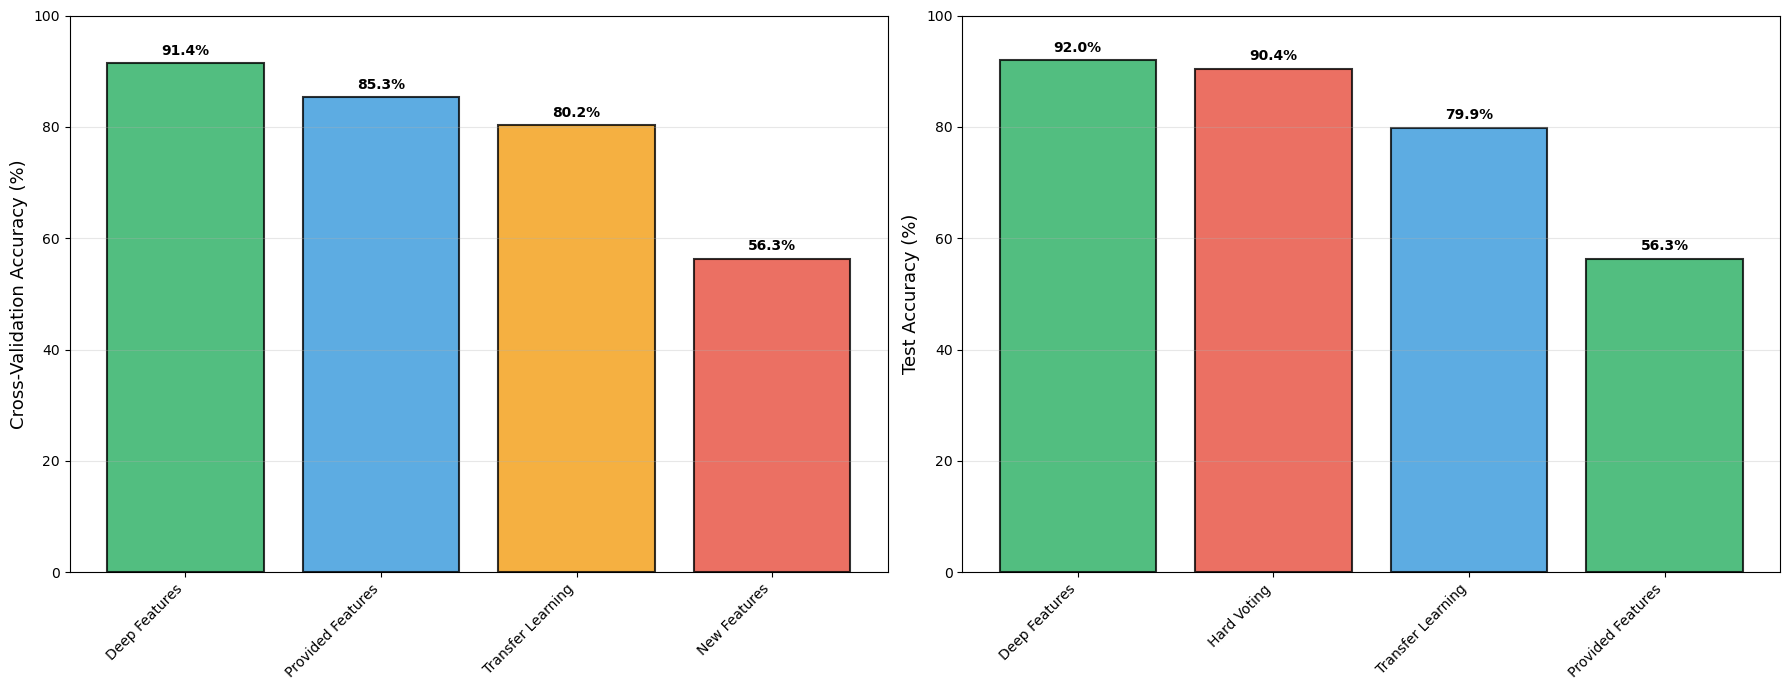

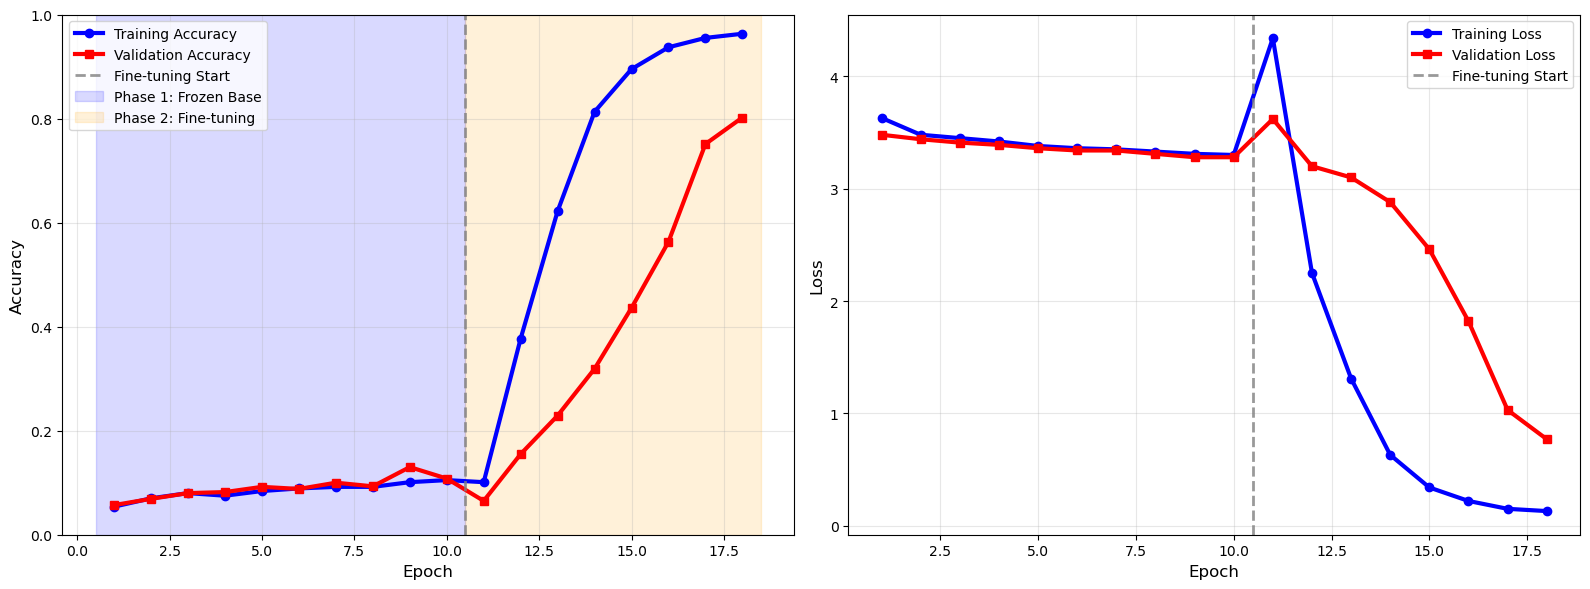

In [7]:
# figure 1:Feature Set Performance Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# CV Performance comparison
feature_perf = results_df.groupby('Feature_Set')['CV_Accuracy'].max().reset_index()
feature_perf = feature_perf.sort_values('CV_Accuracy', ascending=False)

colors = ['#27ae60', '#3498db', '#f39c12', '#e74c3c']
bars1 = ax1.bar(feature_perf['Feature_Set'], feature_perf['CV_Accuracy'], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

ax1.set_ylabel('Cross-Validation Accuracy (%)', fontsize=13)
ax1.set_ylim(0, 100)
ax1.grid(axis='y', alpha=0.3)

# add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# test Performance comparison
test_data = results_df[results_df['Test_Accuracy'].notna()]
test_grouped = test_data.groupby('Feature_Set')['Test_Accuracy'].max().reset_index()
test_grouped = test_grouped.sort_values('Test_Accuracy', ascending=False)

bars2 = ax2.bar(test_grouped['Feature_Set'], test_grouped['Test_Accuracy'], 
               color=['#27ae60', '#e74c3c', '#3498db'], alpha=0.8, 
               edgecolor='black', linewidth=1.5)

ax2.set_ylabel('Test Accuracy (%)', fontsize=13)
ax2.set_ylim(0, 100)
ax2.grid(axis='y', alpha=0.3)

# add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('figure1_feature_set_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# figure4: CNN Training History.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# training curves
ax1.plot(epochs_total, train_accuracy, 'b-', linewidth=3, label='Training Accuracy', marker='o')
ax1.plot(epochs_total, val_accuracy, 'r-', linewidth=3, label='Validation Accuracy', marker='s')

# mark phase transition
ax1.axvline(x=10.5, color='gray', linestyle='--', alpha=0.8, linewidth=2, label='Fine-tuning Start')
ax1.fill_between([0.5, 10.5], 0, 1, alpha=0.15, color='blue', label='Phase 1: Frozen Base')
ax1.fill_between([10.5, 18.5], 0, 1, alpha=0.15, color='orange', label='Phase 2: Fine-tuning')

ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
#ax1.set_title('CNN Training History - Accuracy', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_ylim(0, 1)

# loss curves
ax2.plot(epochs_total, train_loss, 'b-', linewidth=3, label='Training Loss', marker='o')
ax2.plot(epochs_total, val_loss, 'r-', linewidth=3, label='Validation Loss', marker='s')
ax2.axvline(x=10.5, color='gray', linestyle='--', alpha=0.8, linewidth=2, label='Fine-tuning Start')

ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
#ax2.set_title('CNN Training History - Loss', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('figure4_cnn_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()


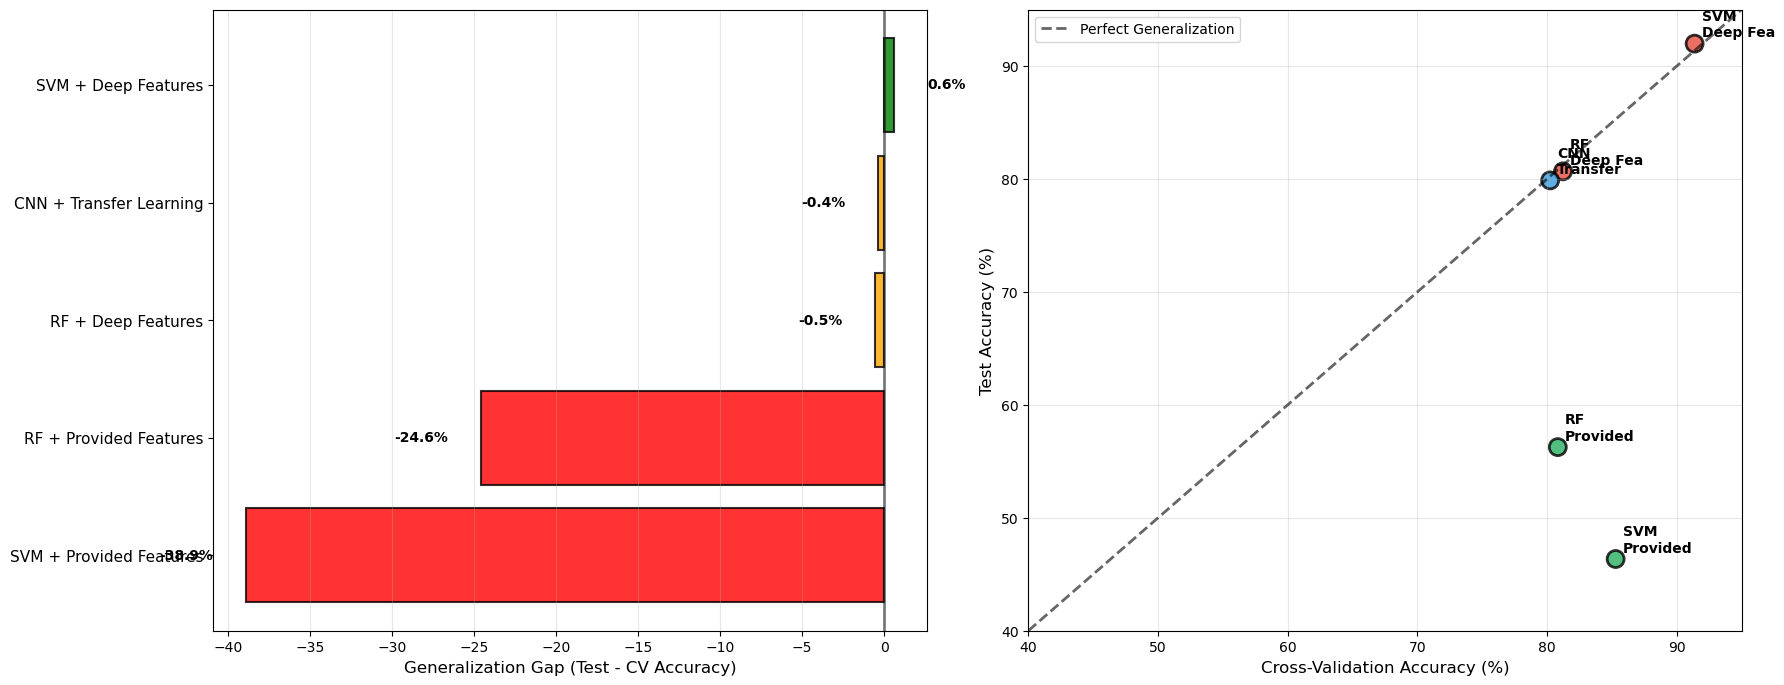

In [10]:
# Figure 5: generalization gap analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# generalization gap bar chart
gap_data = results_df[results_df['Generalization_Gap'].notna()].copy()
gap_data = gap_data.sort_values('Generalization_Gap', ascending=True)

colors = ['red' if x < -10 else 'orange' if x < 0 else 'green' for x in gap_data['Generalization_Gap']]
bars = ax1.barh(range(len(gap_data)), gap_data['Generalization_Gap'], 
                color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# customize labels
labels = [f"{row['Model']} + {row['Feature_Set']}" for _, row in gap_data.iterrows()]
ax1.set_yticks(range(len(gap_data)))
ax1.set_yticklabels(labels, fontsize=11)
ax1.set_xlabel('Generalization Gap (Test - CV Accuracy)', fontsize=12)
#ax1.set_title('Generalization Performance Analysis', fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=2)
ax1.grid(axis='x', alpha=0.3)

# add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + (2 if width >= 0 else -2), bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left' if width >= 0 else 'right', va='center', 
             fontweight='bold', fontsize=10)

# CV vs Test scatter plot
test_models = results_df[results_df['Test_Accuracy'].notna()]
colors_scatter = ['#e74c3c', '#e74c3c', '#3498db', '#27ae60', '#27ae60', '#9b59b6']

scatter = ax2.scatter(test_models['CV_Accuracy'], test_models['Test_Accuracy'], 
                     c=colors_scatter, s=150, alpha=0.8, edgecolor='black', linewidth=2)

# perfect generalization line
ax2.plot([40, 95], [40, 95], 'k--', alpha=0.6, linewidth=2, label='Perfect Generalization')

# add model labels
for _, row in test_models.iterrows():
    ax2.annotate(f"{row['Model']}\n{row['Feature_Set'][:8]}", 
                (row['CV_Accuracy'], row['Test_Accuracy']),
                xytext=(5, 5), textcoords='offset points', fontsize=10, 
                ha='left', fontweight='bold')

ax2.set_xlabel('Cross-Validation Accuracy (%)', fontsize=12)
ax2.set_ylabel('Test Accuracy (%)', fontsize=12)
#ax2.set_title('CV vs Test Performance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xlim(40, 95)
ax2.set_ylim(40, 95)

plt.tight_layout()
plt.savefig('figure5_generalization_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

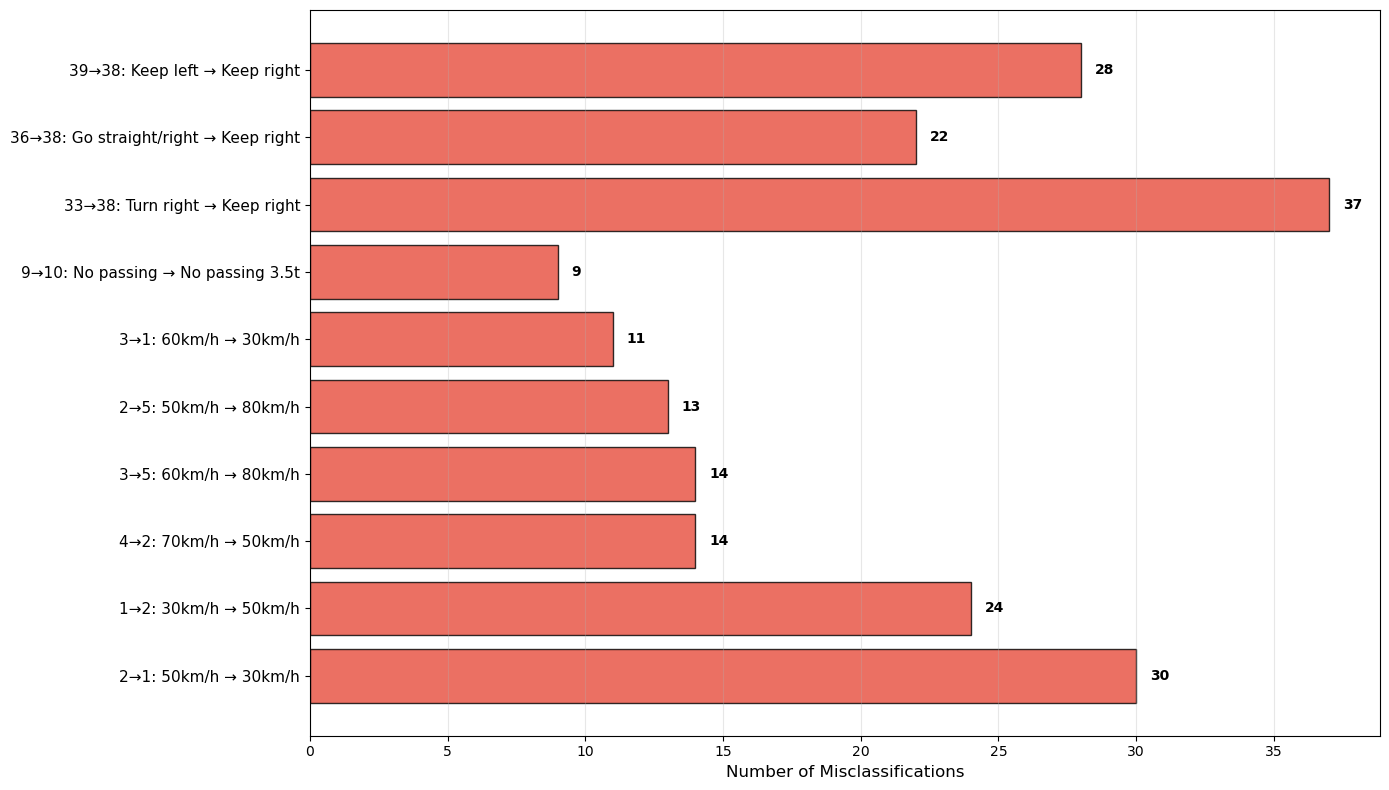

In [11]:
# figure 6 : confusion analysis
fig, ax = plt.subplots(figsize=(14, 8))

# create confusion matrix visualization for top confusions
top_confusions = confusion_df.head(10)

y_pos = np.arange(len(top_confusions))
bars = ax.barh(y_pos, top_confusions['Count'], color='#e74c3c', alpha=0.8, edgecolor='black')

# customize labels
confusion_labels = [f"{row['True_Class']}→{row['Pred_Class']}: {row['True_Name']} → {row['Pred_Name']}" 
                   for _, row in top_confusions.iterrows()]
ax.set_yticks(y_pos)
ax.set_yticklabels(confusion_labels, fontsize=11)
ax.set_xlabel('Number of Misclassifications', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{int(width)}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figure6_confusion_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

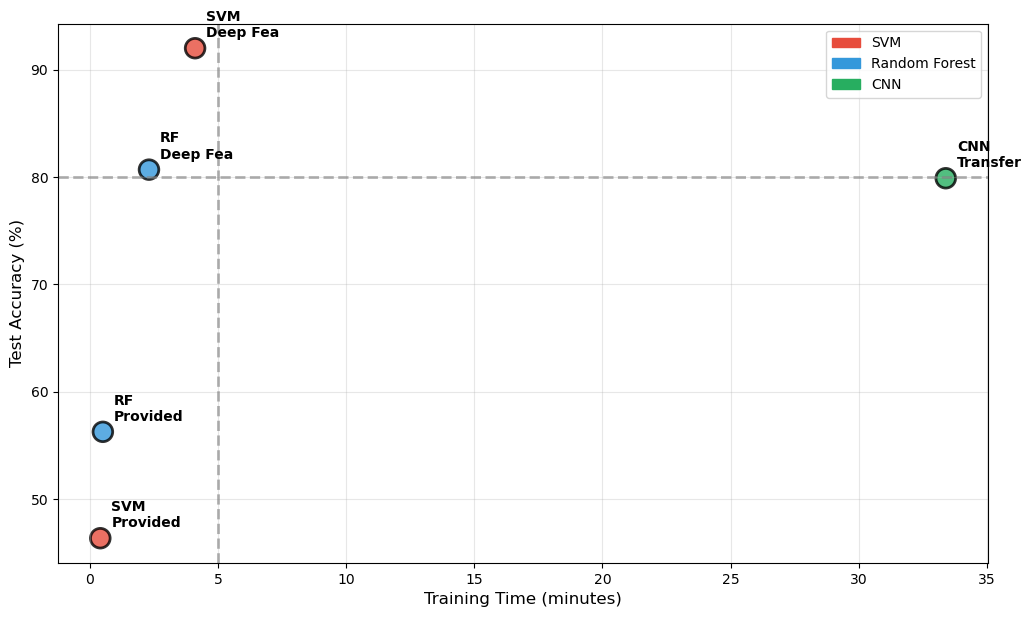

In [13]:
# figure 7 : training time vs accuracy analysis
fig, ax = plt.subplots(figsize=(12, 7))

# filter data with both metrics
efficiency_data = results_df[(results_df['Training_Time'].notna()) & 
                           (results_df['Test_Accuracy'].notna())].copy()

colors_map = {'SVM': '#e74c3c', 'RF': '#3498db', 'CNN': '#27ae60'}
colors = [colors_map[model] for model in efficiency_data['Model']]

scatter = ax.scatter(efficiency_data['Training_Time'], efficiency_data['Test_Accuracy'], 
                    c=colors, s=200, alpha=0.8, edgecolor='black', linewidth=2)

# add labels for each point
for _, row in efficiency_data.iterrows():
    ax.annotate(f"{row['Model']}\n{row['Feature_Set'][:8]}", 
                (row['Training_Time'], row['Test_Accuracy']),
                xytext=(8, 8), textcoords='offset points', fontsize=10, ha='left',
                fontweight='bold')

ax.set_xlabel('Training Time (minutes)', fontsize=12)
ax.set_ylabel('Test Accuracy (%)', fontsize=12)
ax.grid(alpha=0.3)

# add efficiency frontier lines
ax.axhline(y=80, color='gray', linestyle='--', alpha=0.6, linewidth=2, label='80% Accuracy Threshold')
ax.axvline(x=5, color='gray', linestyle='--', alpha=0.6, linewidth=2, label='5-minute Training Threshold')

# create legend for models
import matplotlib.patches as mpatches
svm_patch = mpatches.Patch(color='#e74c3c', label='SVM')
rf_patch = mpatches.Patch(color='#3498db', label='Random Forest')
cnn_patch = mpatches.Patch(color='#27ae60', label='CNN')
ax.legend(handles=[svm_patch, rf_patch, cnn_patch])

plt.savefig('figure7_efficiency_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

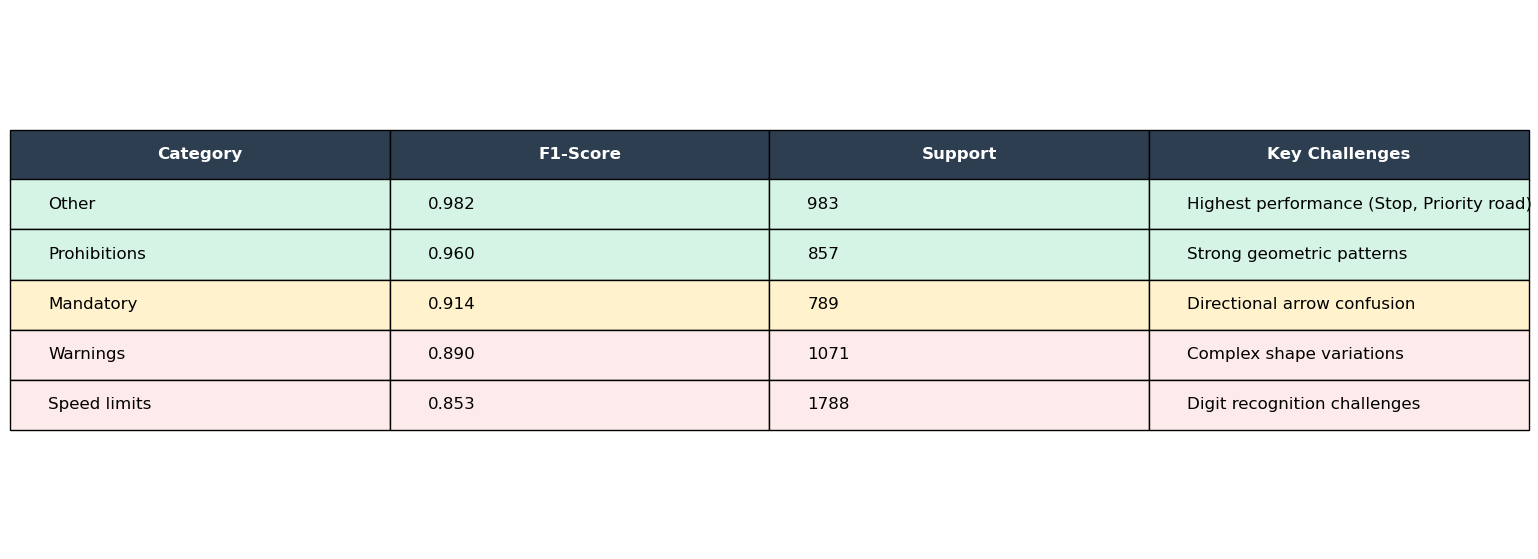

In [14]:
# TABLE 3: Per-Category Performance
fig, ax = plt.subplots(figsize=(14, 7))
ax.axis('tight')
ax.axis('off')

# prepare category table data
category_table_data = []
for _, row in category_df.iterrows():
    category_table_data.append([
        row['Category'],
        f"{row['F1_Score']:.3f}",
        f"{row['Support']:.0f}",
        row['Key_Challenges']
    ])

headers = ['Category', 'F1-Score', 'Support', 'Key Challenges']

table = ax.table(cellText=category_table_data, colLabels=headers, 
                cellLoc='left', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.4, 3)

# color code header
for i in range(len(headers)):
    table[(0, i)].set_facecolor('#2c3e50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# color code by performance
for i, row in enumerate(category_table_data):
    row_idx = i + 1
    f1_score = float(row[1])
    if f1_score > 0.95:
        color = '#d5f4e6'  # Green for high performance
    elif f1_score > 0.90:
        color = '#fff2cc'  # Yellow for medium performance  
    else:
        color = '#fdeaea'  # Red for lower performance
    
    for j in range(len(headers)):
        table[(row_idx, j)].set_facecolor(color)
        
plt.savefig('table3_category_performance.png', dpi=300, bbox_inches='tight')
plt.show()

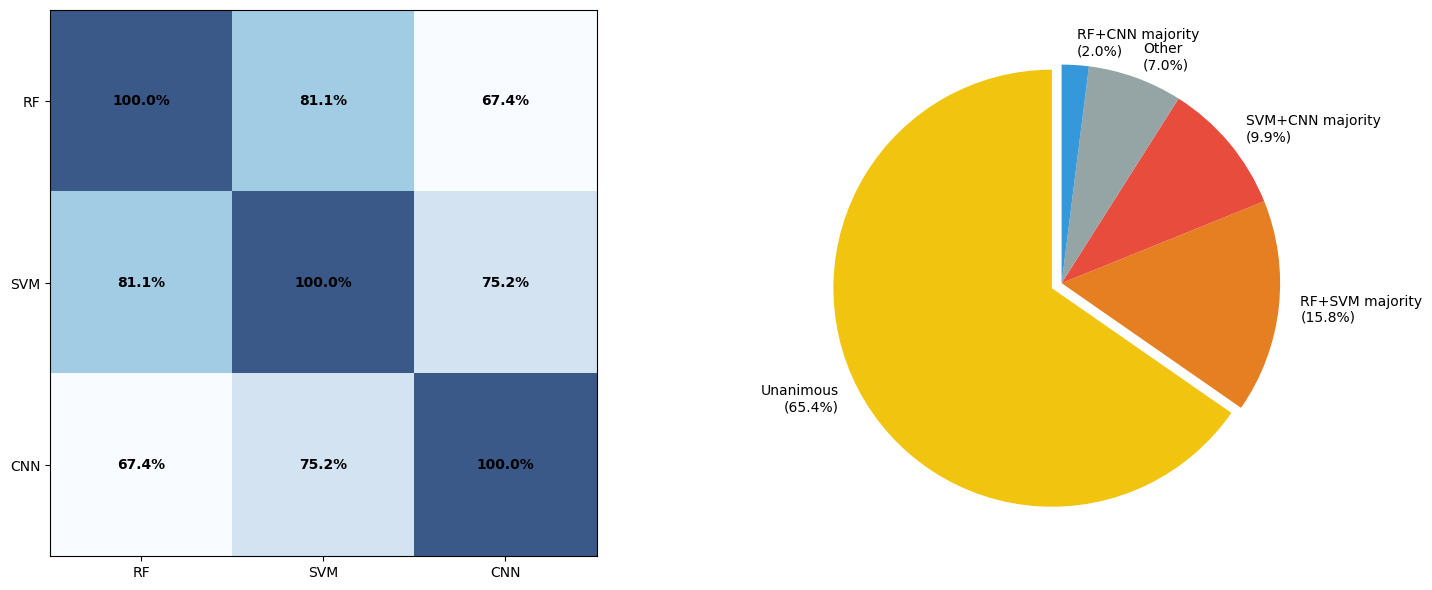

In [16]:
# ensemble agreement analysis, can just tale in report( more easy to do )
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# agreement matrix
agreement_matrix = np.array([[100, 81.1, 67.4],
                            [81.1, 100, 75.2],
                            [67.4, 75.2, 100]])

model_names = ['RF', 'SVM', 'CNN']
im = ax1.imshow(agreement_matrix, cmap='Blues', alpha=0.8)

# add text annotations
for i in range(len(model_names)):
    for j in range(len(model_names)):
        text = ax1.text(j, i, f'{agreement_matrix[i, j]:.1f}%',
                       ha="center", va="center", color="black", fontweight='bold')

ax1.set_xticks(range(len(model_names)))
ax1.set_yticks(range(len(model_names)))
ax1.set_xticklabels(model_names)
ax1.set_yticklabels(model_names)
#ax1.set_title('Model Agreement Matrix (%)', fontsize=14, fontweight='bold')

# voting pattern pie chart
voting_patterns = ['Unanimous\n(65.4%)', 'RF+SVM majority\n(15.8%)', 
                  'SVM+CNN majority\n(9.9%)', 'Other\n(7.0%)', 'RF+CNN majority\n(2.0%)']
voting_values = [65.4, 15.8, 9.9, 7.0, 2.0]
colors = ['#f1c40f', '#e67e22', '#e74c3c', '#95a5a6', '#3498db']

wedges, texts, autotexts = ax2.pie(voting_values, labels=voting_patterns, colors=colors, 
                                  autopct='', startangle=90, explode=(0.05, 0, 0, 0, 0))

#ax2.set_title('Voting Pattern Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('ensemble_agreement_analysis.png', dpi=300, bbox_inches='tight')
plt.show()